(3, 13)
0.7848290598290597
[0.79205128 0.77692308 0.78551282]
0.0061949600001267565


<Axes: >

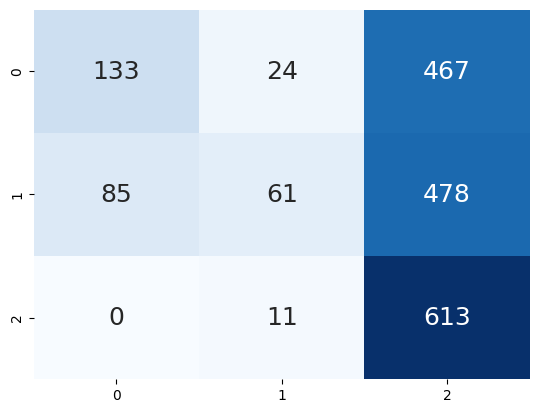

In [11]:
# leave_pair_one_out
import numpy as np
import datetime
import seaborn as sns

TRY_NUM = 3
LEAVE_PARIR_NUM = 13
train_acc_list = np.zeros([TRY_NUM, LEAVE_PARIR_NUM])
train_time = np.zeros([TRY_NUM, LEAVE_PARIR_NUM])
conf_mat = np.zeros([3, 3])



name = f"../results/leave_4_pair_out/STGCN/VITPOSE_AUG2"

for i in range(1, TRY_NUM+1):
    for j in range(1, LEAVE_PARIR_NUM+1):
        train_acc_list[i-1, j-1] = np.load(f"{name}/{i}/{j}/results/val_acc.npy").max()
        conf_mat += np.load(f"{name}/{i}/{j}/test/conf_mat.npy")
        # train_time[i-1, j-1] = np.load(f"{name}/{i}/{j}/results/train_time.npy")
        
        # conf_mat += np.load(f"{name}/{i}/{j}/results/conf_mat.npy")

            
# data = np.load(f"4D/STGCN/1-1/1/results/conf_mat.npy")

# print(train_acc_list[0, 2])
# print(conf_mat)    
print(train_acc_list.shape)
# print(train_acc_list)
print(np.mean(train_acc_list))
print(np.mean(train_acc_list, axis=1))
print(np.std(np.mean(train_acc_list, axis=1)))     
# print("time :", datetime.timedelta(seconds=np.sum(train_time)))
# print(np.mean(train_acc_list), np.std(train_acc_list))
sns.heatmap(conf_mat.astype(int), annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"fontsize": 18})
